In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 5.5 MB/s eta 0:00:00


In [3]:
from arch.bootstrap import IIDBootstrap, IndependentSamplesBootstrap

In [4]:
# Загрузим данные и посмотрим на небольшую часть данных о продажах в магазине AppleStore
data = pd.read_csv('./AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [7]:
data.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [16]:
data.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


Нам интересно, какой средний рейтинг продукции Apple

In [6]:
x=data['user_rating']

In [8]:
#Найдем точечную оценку для мат.ожидания
mu_hat = np.mean(x)
mu_hat

3.526955675976101

In [12]:
#строим доверительный интервал
rng = np.random.default_rng(111111)
n_boot = 1000
mu_hat_star = [np.mean(rng.choice(x, size=len(x))) for i in range(n_boot)]

In [13]:
mu_hat_star[1:10]

[3.529943031818813,
 3.5220925385577324,
 3.49576212310685,
 3.5482145338335416,
 3.548145060441851,
 3.523620953174934,
 3.523134639433097,
 3.5307072391274144,
 3.5446019174656107]

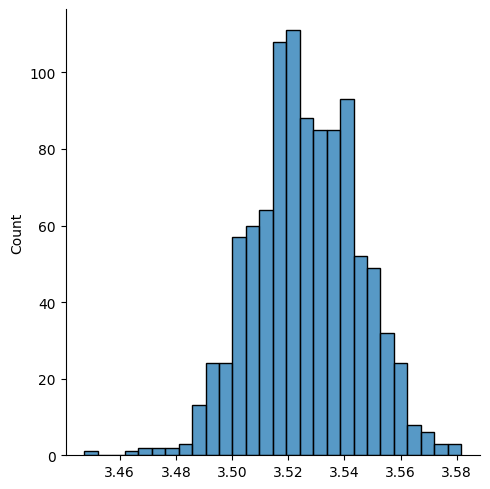

In [14]:
sns.displot(x=np.array(mu_hat_star))

Наивный бутстрэп доверительный интервал для $\mu=E(X_i)$:

In [15]:
[np.quantile(mu_hat_star, 0.025), np.quantile(mu_hat_star, 0.975)]

[3.4908937751841043, 3.5610723218007503]

Разброс достаточно небольшой, высокая точность оценки

Давайте проверим, какая корреляция между оценкой user_rating	с user_rating_ver	(с другой платформы)


In [18]:
def corr(x, y):
  corr_mat = np.corrcoef(x, y)
  return corr_mat[0, 1]

In [19]:
w=data['user_rating_ver']
boot_xw = IIDBootstrap(x, w, seed=111111)
boot_xw.conf_int(corr, method='basic', reps=10000, size=0.95)

array([[0.7595642 ],
       [0.78899003]])

Давайте проверим, какая корреляция между оценкой user_rating	с price	(с другой платформы)

In [20]:
w=data['price']
boot_xw = IIDBootstrap(x, w, seed=111111)
boot_xw.conf_int(corr, method='basic', reps=10000, size=0.95)

array([[0.01474899],
       [0.06103042]])

Пусть оценки рейтинга с разных платформ независимы, тогда мы можем проверить разницу средних значений рейтинга с
разных платформ

In [21]:
def mean_diff(x, y):
  return np.mean(y) - np.mean(x)

In [22]:
y=data['user_rating_ver']

In [23]:
boot_xy = IndependentSamplesBootstrap(x, y, seed=111111)
boot_xy.conf_int(mean_diff, reps=10000, size=0.95, method='basic')

array([[-0.32729089],
       [-0.21786856]])

# Лекция


In [25]:
rng = np.random.default_rng(111111)
x = rng.normal(loc=5, scale=4, size=20)

In [ ]:
x

array([ 8.75056101,  2.04660955,  5.82436808,  2.81933431,  3.55431834,
        4.36497893, 10.94214485,  6.52441297,  8.72714931,  8.57755903,
        4.47753664,  8.80829036,  5.072406  ,  3.54047913,  5.48872283,
        7.6829816 ,  2.43211183, -3.41245328,  8.78998033, -1.76474929])

$E(X_i) = 5$, $Var(X_i) = 4^2$, $X_i$ независимы.

In [ ]:
np.mean(x)

5.162337126364272

Поиграем в настоящего исследователя, сделаем вид, что мы не знаем $E(X_i)$. Мы можем получить точечную оценку для математического ожидания. Естественная формула, $\bar x = \frac{x_1 +\ldots + x_n}{n}$.

In [ ]:
mu_hat = np.mean(x)
mu_hat

5.162337126364272

Как построить доверительный интервал для неизвестного $\mu = E(X_i)$?
Хочу точечную оценку превратить в интервальную. Достаточно «размножить» точечную оценку.

Выход: из наших $n=20$ наблюдений случайно выберем $20$ с возможностью повтора.

In [ ]:
x_star1 = rng.choice(x, size=len(x))

In [ ]:
x_star1

array([ 5.072406  ,  7.6829816 ,  7.6829816 , 10.94214485,  3.55431834,
        3.55431834,  8.57755903,  3.54047913,  5.82436808,  4.36497893,
        8.75056101,  8.80829036,  8.57755903, -3.41245328,  4.47753664,
        6.52441297,  8.75056101,  2.04660955,  5.82436808,  7.6829816 ])

In [ ]:
np.mean(x_star1)

5.941348143400953

In [ ]:
x_star2 = rng.choice(x, size=len(x))
np.mean(x_star2)

5.382909324145878

In [ ]:
x_star2

array([ 3.55431834,  7.6829816 ,  5.82436808,  3.54047913,  4.36497893,
       10.94214485,  6.52441297,  3.55431834,  8.75056101,  7.6829816 ,
        5.072406  ,  7.6829816 ,  5.82436808,  4.47753664, -1.76474929,
        7.6829816 ,  2.43211183,  2.81933431,  8.57755903,  2.43211183])

In [ ]:
n_boot = 1000
mu_hat_star = [np.mean(rng.choice(x, size=len(x))) for i in range(n_boot)]

In [ ]:
mu_hat_star[1:10]

[6.713233840263672,
 5.617551215067908,
 5.35446519920025,
 5.481905847543931,
 6.692005176307161,
 4.99720648239316,
 5.301918245945239,
 5.211700883514384,
 5.676470991935876]

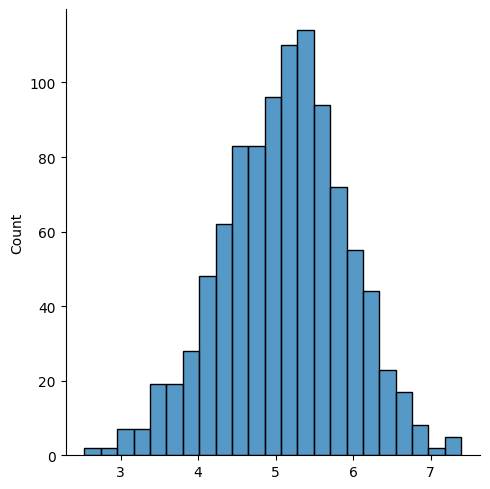

In [ ]:
sns.displot(x=np.array(mu_hat_star))

Наивный бутстрэп доверительный интервал для $\mu=E(X_i)$:

In [ ]:
[np.quantile(mu_hat_star, 0.025), np.quantile(mu_hat_star, 0.975)]

[3.466441480784882, 6.62888113822821]

Плюсы:
1. Мы можем не знать формулы для дисперсии оценки.

Мы не использовали $Var(\hat\mu)$.

2. В большинстве случаев формулы верны при больших $n$.
И бутстрэп тоже требует больших $n$.

Часто оказывается, что большое $n$, нужное для «правильного» варианта бутстрэпа, гораздо меньше, чем большое $n$, нужное для центральной предельной теоремы.

In [ ]:
boot_x = IIDBootstrap(x, seed=111111)
boot_x.conf_int(np.mean, method='basic', reps=10000, size=0.95)

array([[3.67824331],
       [6.76505453]])

In [ ]:
boot_x.conf_int(np.std, method='basic', reps=10000, size=0.95)

array([[2.63833899],
       [4.8650567 ]])

Tim Hestergerg, What teachers should know about bootstrap?

In [ ]:
w = x + rng.normal(loc=1, scale=3, size=len(x))

In [ ]:
np.corrcoef(x, w)

In [ ]:
def corr(x, y):
  corr_mat = np.corrcoef(x, y)
  return corr_mat[0, 1]

In [ ]:
corr(x, w)

0.8326566707478291

In [ ]:
x

array([ 8.75056101,  2.04660955,  5.82436808,  2.81933431,  3.55431834,
        4.36497893, 10.94214485,  6.52441297,  8.72714931,  8.57755903,
        4.47753664,  8.80829036,  5.072406  ,  3.54047913,  5.48872283,
        7.6829816 ,  2.43211183, -3.41245328,  8.78998033, -1.76474929])

In [ ]:
w

array([11.91168901,  2.56161307, -0.05905122,  5.75234653,  1.9965966 ,
        4.89802143, 13.18925613,  5.94531856, 13.8390005 , 12.39287802,
        2.98500801,  7.49480114,  2.89315956,  7.37127129,  6.71418125,
        7.15422325,  5.34030994, -0.66562737, 11.09626948, -4.77853031])

In [ ]:
obs_id = rng.choice(range(len(x)), size=len(x))
obs_id

array([14,  2, 12,  4,  9, 18, 16, 19,  4,  9,  6, 11, 10, 13, 12,  1,  9,
        9,  2, 12])

In [ ]:
x_star1 = x[obs_id]
x_star1

array([ 5.48872283,  5.82436808,  5.072406  ,  3.55431834,  8.57755903,
        8.78998033,  2.43211183, -1.76474929,  3.55431834,  8.57755903,
       10.94214485,  8.80829036,  4.47753664,  3.54047913,  5.072406  ,
        2.04660955,  8.57755903,  8.57755903,  5.82436808,  5.072406  ])

In [ ]:
w_star1 = w[obs_id]
w_star1

array([ 6.71418125, -0.05905122,  2.89315956,  1.9965966 , 12.39287802,
       11.09626948,  5.34030994, -4.77853031,  1.9965966 , 12.39287802,
       13.18925613,  7.49480114,  2.98500801,  7.37127129,  2.89315956,
        2.56161307, 12.39287802, 12.39287802, -0.05905122,  2.89315956])

In [ ]:
corr(x_star1, w_star1)

0.8248153261423454

In [ ]:
boot_xw = IIDBootstrap(x, w, seed=111111)
boot_xw.conf_int(corr, method='basic', reps=10000, size=0.95)

array([[0.73375844],
       [1.02066742]])

In [ ]:
4 - 3 == 1

True

In [ ]:
0.4 - 0.3 == 0.1

False

In [ ]:
y = rng.normal(loc=9, scale=3, size=25)

In [ ]:
y

array([12.14268681, 12.17501015,  6.73312431, 11.99569635,  5.82977991,
        0.8671864 ,  7.99425006,  8.21486399,  9.23877598,  8.63018244,
        7.6098239 ,  8.11828919,  6.51132991, 13.55765964,  8.7764837 ,
        7.66390195, 10.48363553, 12.94911141,  6.01879175, 11.17176947,
       12.4419654 ,  8.79761341,  5.98529289,  6.86739964,  4.7187951 ])

In [ ]:
def mean_diff(x, y):
  return np.mean(y) - np.mean(x)

In [ ]:
boot_xy = IndependentSamplesBootstrap(x, y, seed=111111)
boot_xy.conf_int(mean_diff, reps=10000, size=0.95, method='basic')

array([[1.53302614],
       [5.35966773]])

In [ ]:
?boot_xy.conf_int